# Well Stratigraphic Forward Modeling

This notebook shows how to use pyWellSFM to simulate the deposits along a well.

### Import modules and load data

In [7]:
import os
import sys

root_path = os.path.dirname(os.getcwd())
package_path = os.path.join(root_path, "src")
if package_path not in sys.path:
    sys.path.append(package_path)

import matplotlib.pyplot as plt

from pywellsfm import (
    FSSimulatorRunner,
    FSSimulatorRunnerData,
)
from pywellsfm.io import loadSimulationData


# Load the simulation data from the JSON file
simulation_filepath = os.path.join(root_path, "tests/data/simulation.json")
simulationData: FSSimulatorRunnerData = loadSimulationData(simulation_filepath)

print("Loaded simulation data:")
print(f"Scenario name: {simulationData.scenario.name}")
print(f"Number of realizations: {len(simulationData.realizationDataList)}")
print(f"Well names: {[rd.well.name for rd in simulationData.realizationDataList]}")

Interpolation method set to 'linear' by default
Loaded simulation data:
Scenario name: Scenario1
Number of realizations: 2
Well names: ['Well1', 'Well2']


### Create the simulator runner with default parameters and run the simulation


In [8]:
simulator = FSSimulatorRunner(
    simulationData.scenario,
    simulationData.realizationDataList,
    max_bathymetry_change_per_step=0.5,
    dt_min=0.001,
    dt_max=0.1,
    safety=0.9,
    max_steps=int(1e9)
)

simulator.prepare()
simulator.run()
simulator.finalize()

Running time step at age 30.0000 over 10.0000 Myr...
Running time step at age 29.9478 over 10.0000 Myr...
Running time step at age 29.8578 over 10.0000 Myr...
Running time step at age 29.7678 over 10.0000 Myr...
Running time step at age 29.6778 over 10.0000 Myr...
Running time step at age 29.5878 over 10.0000 Myr...
Running time step at age 29.4978 over 10.0000 Myr...
Running time step at age 29.4078 over 10.0000 Myr...
Running time step at age 29.3178 over 10.0000 Myr...
Running time step at age 29.2278 over 10.0000 Myr...
Running time step at age 29.1378 over 10.0000 Myr...
Running time step at age 29.0478 over 10.0000 Myr...
Running time step at age 28.9578 over 10.0000 Myr...
Running time step at age 28.8678 over 10.0000 Myr...
Running time step at age 28.7778 over 10.0000 Myr...
Running time step at age 28.6878 over 10.0000 Myr...
Running time step at age 28.5978 over 10.0000 Myr...
Running time step at age 28.5078 over 10.0000 Myr...
Running time step at age 28.4178 over 10.0000 

### Plot results

Well 1

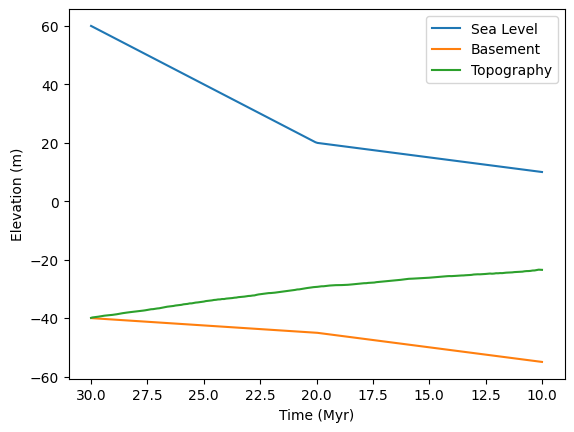

In [9]:
ds = simulator.outputs
assert ds is not None, "Simulator outputs should not be None after finalization."

i = 0  # realization index
t = ds["time"].values
sea = ds["sea_level"].values
base = ds["basement"].isel(realization=i).values
topo = base + ds["thickness_cumul"].isel(realization=i).values

plt.figure()
plt.plot(t, sea, label="Sea Level")
plt.plot(t, base, label="Basement")
plt.plot(t, topo, label="Topography")

plt.gca().invert_xaxis()  # reverse x-axis to show time going from past to present
plt.xlabel("Time (Myr)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.show()

Well 2

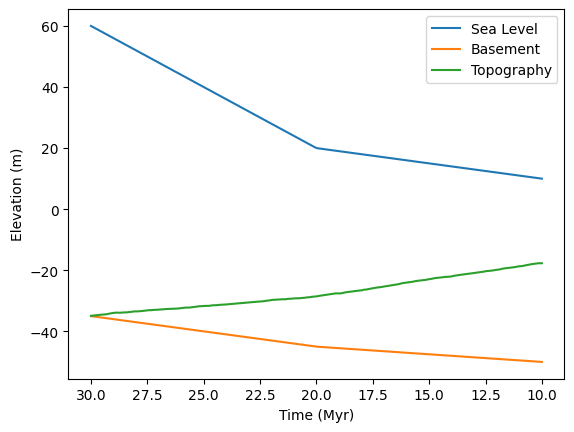

In [10]:
ds = simulator.outputs
assert ds is not None, "Simulator outputs should not be None after finalization."

i = 1  # realization index
t = ds["time"].values
sea = ds["sea_level"].values
base = ds["basement"].isel(realization=i).values
topo = base + ds["thickness_cumul"].isel(realization=i).values

plt.figure()
plt.plot(t, sea, label="Sea Level")
plt.plot(t, base, label="Basement")
plt.plot(t, topo, label="Topography")

plt.gca().invert_xaxis()  # reverse x-axis to show time going from past to present
plt.xlabel("Time (Myr)")
plt.ylabel("Elevation (m)")
plt.legend()
plt.show()